# Introductory Gradient Descent

**Machine learning** is probably a phrase you have heard when talking about AI. However, you don't often hear about how a machine actually learns. This notebook intends to explain the most important technique that enables us to build all of the incredible AI technologies you see around us today: **gradient descent**.

## The Problem

**the data**:
You can see a plot below which shows a fake dataset depicting the square footage of a house and the cost of the house. What I want you to imagine is that each dot on the plot is an actual house of that size and sold for that price. For instance, the red dot indicates a real house that was 140ft^2 and sold for $160000. 

**the question**:
If I were to ask you what the price of a house that was 135ft^2 would be based on the data, you would probably say somewhere around $140,000. That is because all of the houses around that size sold for around that amount. The question is, how do we train a machine to think the same thing?

In [53]:
import numpy as np
import matplotlib.pyplot as plt

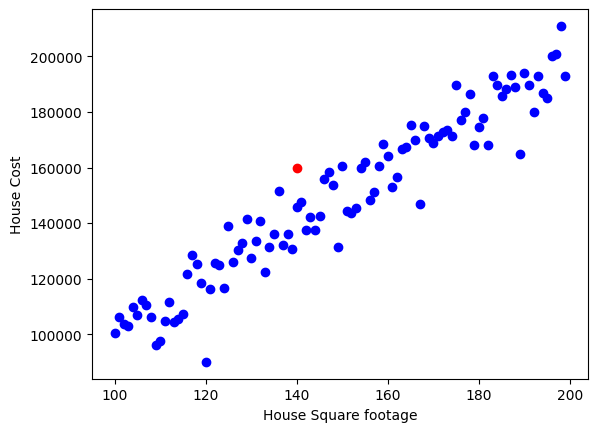

In [54]:
samples_x = np.array([float(x) for x in range(100, 200)])
samples_y = np.random.normal(samples_x * 1000 + 300, 8000)

plt.xlabel("House Square footage")
plt.ylabel("House Cost")
plt.scatter(samples_x, samples_y, c="b")
plt.scatter(140, 160000, c='r')
plt.show()

## Step 1: hypothesis

The first step to getting a machine to estimate the answer is to create a function that will take a house square footage, which we will call x, as an argument and will return the estimated cost of the house, which we will call y. This function is most commonly called the **hypothesis**

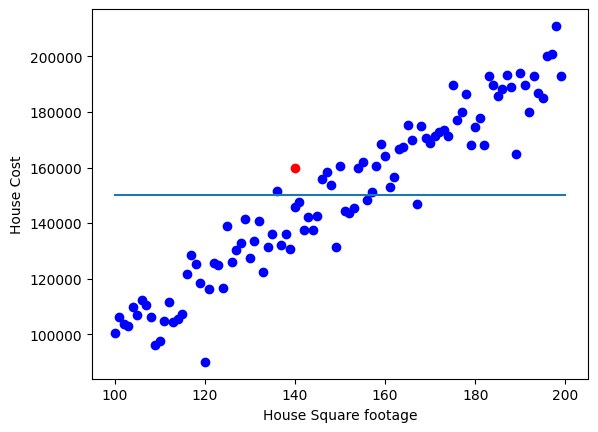

In [55]:

# This function is the hypothesis. It takes in x, which is the ft^2 of a house,
# and returns what the computer thinks the house cost will be. in this case, the computer's
# guess is just 150000, which is probably very wrong.
def estimate_house_cost(x):
    return 150000

plt.xlabel("House Square footage")
plt.ylabel("House Cost")
plt.scatter(samples_x, samples_y, c="b")
plt.scatter(140, 160000, c='r')
plt.plot([100, 200], [estimate_house_cost(100), estimate_house_cost(200)])
plt.show()

The code above creates a hypothesis that is very bad. The dots still represent real house sales and the line represents our hypothesis. If you give our hypothesis and x value, say x=200, it will find the corresponding spot on the line and that will be it's guess. What it is doing is saying every house, regardless of size, will sell for $150,000 dollars. The calculation does not take the house size into consideration. So what is a good hypothesis? Well, it depends on the data. For now, I will just say that the best is a simple line: **y=mx+b**. Below is a better hypothesis.

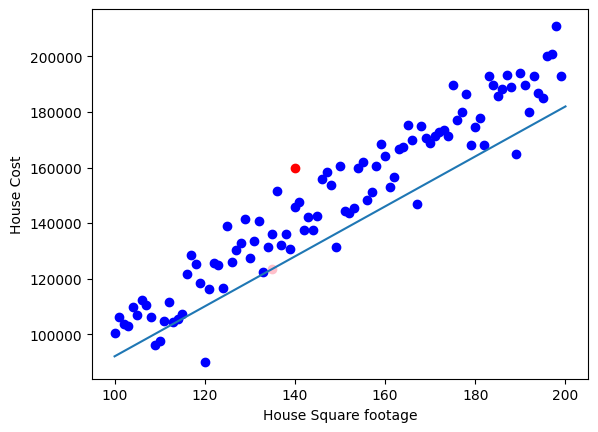

In [56]:
def better_estimate_house_cost(x):
    m, b = 900, 2000
    return m * x + b

plt.xlabel("House Square footage")
plt.ylabel("House Cost")
plt.scatter(samples_x, samples_y, c="b")
plt.scatter(140, 160000, c='r')
plt.plot([100, 200], [better_estimate_house_cost(100), better_estimate_house_cost(200)])
plt.scatter(135, better_estimate_house_cost(135), c='pink')
plt.show()

Here we can see that our new hypothesis where y = 900 * x + 2000 yields a better estimate. To understand the diagram better, we can see a pink dot representing an estimate made by our hypothesis. The model took in x=135 representing the house ft^2, and it chose the spot on the line corresponding to x=135. When seeing this, you should have two questions come to mind: where did the numbers 900 and 2000 come from and is this model the best that we can make? The numbers just came from me choosing them but they are far from the best numbers. Our next step is not just finding better numbers for m and b, but how to write a program to find those better numbers.

## Step 2: The error function

The next crucial equation in order to create a machine learning model is the error function. This function is exactly what it sounds like. It quantifies the error (or how wrong) our hypothesis is based on the data. There are a number of error functions to choose from but for our problem I am choosing error = $\sum_{i=1}^{n}$ $\frac{(y_i - y_h(x_i))^2}{2n}$. This function is known as **Mean Squared Error** or **MSE**. Let's discuss what this function is and later I will explain why I chose this particular one.

First, the most important part of the equation is $(y_i - y_h(x_i))$. In this equation, $y_h(x)$ is our hypothesis. The $\sum_{i=1}^n$ is saying look at every sample in our data. In this case, it is looking at all of the blue dots in our data. From there, it calculates how different our guess $y_h(x)$ is from how much the house actually sold for $y_i$ which often called the **ground truth** and represents the actual answer to a given input. For example, if we look at our red sample again we see $x=140$. The ground truth for that sample would be 160,000.

Next, we see that the value $(y_i - y_h(x_i))$ is squared in the equation. This is done so that the value it produces is always positive. We could use abs() but as we see later that makes things more difficult. Finally, we see that the value is divided by $2n$. By dividing by n, we get the mean. The only reason there is a 2 is to make the math easier later.

### MSE all together

When we put these peices together, we get a function that calcuates the average error of our hypotheses where the error is some positive value. The code below will calculate the error of our two models.

In [ ]:
n = len(samples_x)

model_1_error = int(sum([(samples_y[i] - estimate_house_cost(samples_x[i])) ** 2 / (2 * n) for i in range(n)]))
print("estimate_house_cost error        :", model_1_error)

model_2_error = int(sum([(samples_y[i] - better_estimate_house_cost(samples_x[i])) ** 2 / (2 * n) for i in range(n)]))
print("better_estimate_house_cost error :", model_2_error)

estimate_house_cost error        : 448233298
better_estimate_house_cost error : 118514787


## Understanding the numbers

We can see that the second model we made is performing significantly better than the first. I will explain these numbers a bit more for those who are confused. First, the numbers themselves don't mean anything without reference to another. What does that mean you ask? If we only had the estimate_house_cost error of 411296892 and not the better one, then the number wouldn't mean anything because it would have nothing to compare it to. If we had another model with error 500, then we would know that the other two models were really bad. If we had another with error 1000000000, then that model would be terrible. Think of it like picking out fruit from the store. When you see a bunch of apples to pick from, you don't carry a picture around of the perfect apple to compare the others to. Instead, you find the apple that looks the best compared to the others around it. Errors are the same. The number itself doesn't matter, just how that number compares to the others around it. Secondly, the error with the lowest number is the best one.

In [117]:
m, b = 1, 1
learning_rate = 1e-7

for _ in range(100000):
    for i in range(n):
        m = m + learning_rate * (samples_y[i] - m * samples_x[i] - b) * samples_x[i] / n
        b = b + learning_rate * (samples_y[i] - m * samples_x[i] - b) / n

print(m, b)

998.2371684816942 7.508335419168733


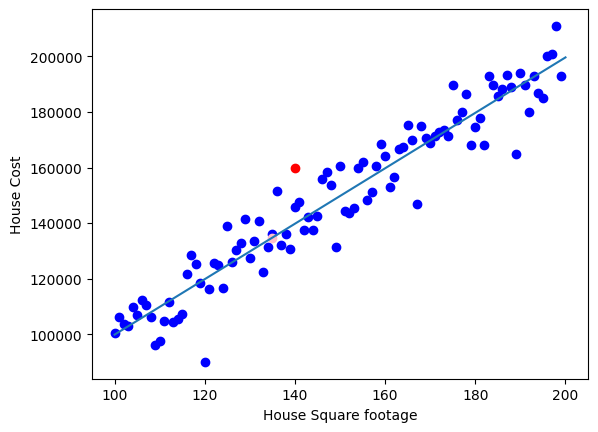

best_estimate_house_cost error : 33939143


In [118]:
def best_estimate_house_cost(x, m, b):
    return m * x + b

plt.xlabel("House Square footage")
plt.ylabel("House Cost")
plt.scatter(samples_x, samples_y, c="b")
plt.scatter(140, 160000, c='r')
plt.plot([100, 200], [best_estimate_house_cost(100, m, b), best_estimate_house_cost(200, m, b)])
plt.scatter(135, best_estimate_house_cost(135, m, b), c='pink')
plt.show()

model_3_error = int(sum([(samples_y[i] - best_estimate_house_cost(samples_x[i], m, b)) ** 2 / (2 * n) for i in range(n)]))
print("best_estimate_house_cost error :", model_3_error)